1.2599210500177698


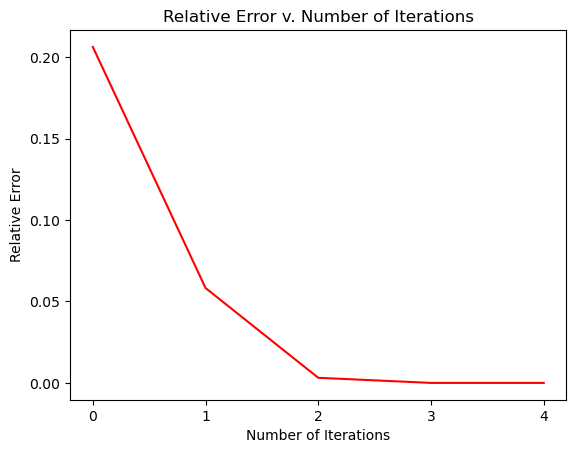

In [8]:
import sklearn.datasets
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return (x**3)-2


def fPrime(x):
    return 3*(x**2)


def error(x):
    return abs(x-xstar) / abs(xstar)


def newton(x):
    epsilon = 1e-8
    for i in range(MAX_ITER):
        e = error(x)
        errorList.append(e)
        if(e < epsilon):
            break
        x = x - func(x)/fPrime(x)
    print(x)


MAX_ITER = 5000
errorList = []
xstar = 2**(1/3) # actual derivative

newton(1) # prints estimated derivative

plt.xlabel("Number of Iterations")
plt.ylabel("Relative Error")
plt.title("Relative Error v. Number of Iterations")
plt.plot(errorList, color='red')
plt.xticks(range(5))
plt.show()

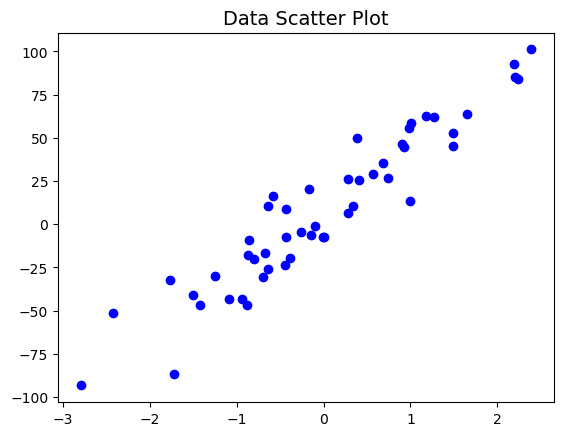

In [18]:
N = 50
max_iter = 5000
h = 1e-2  # around -2 and -3 seems to be ideal
data = sk.datasets.make_regression(N, 1, noise=15, coef=True, bias=5, random_state=123)
x_vals = data[0]
y_vals = data[1]

plt.title('Data Scatter Plot', size = 14)
plt.scatter(x_vals, y_vals, color='blue')
plt.show()

Slope =  35.423582673374476
Intercept =  8.016560440743593


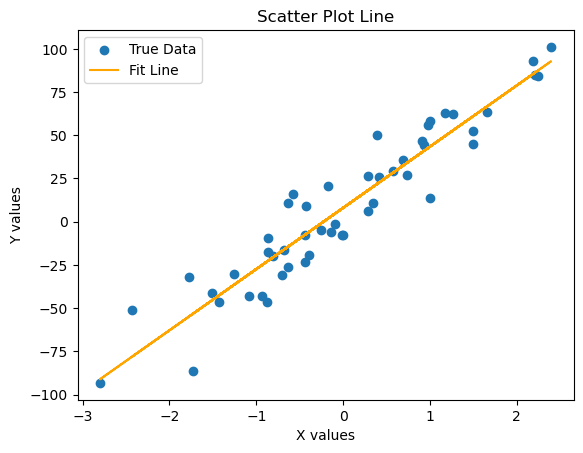

In [20]:
def L(B, X, y):
    return (np.linalg.norm(X@B-y)**2) / N


def gradient(B, X, y):
    inside = X@B-y
    out = X.T@inside
    return (2/N)*out


def gradient_descent(B, X, y):
    for i in range(max_iter):
        B = B - h*gradient(B, X, y)
    return B


X = np.zeros((N, 2))
for i in range(N):
    X[i, 0] = 1
    X[i, 1] = x_vals[i]

beta = [0, 1]
newBeta = gradient_descent(beta, X, y_vals)

m = newBeta[1]
b = newBeta[0]

y_est = m*x_vals + b
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot Line")
plt.scatter(x_vals, y_vals, label='True Data')
plt.plot(x_vals, y_est, color='orange', label='Fit Line')
plt.legend()
print("Slope = ", m)
print("Intercept = ", b)

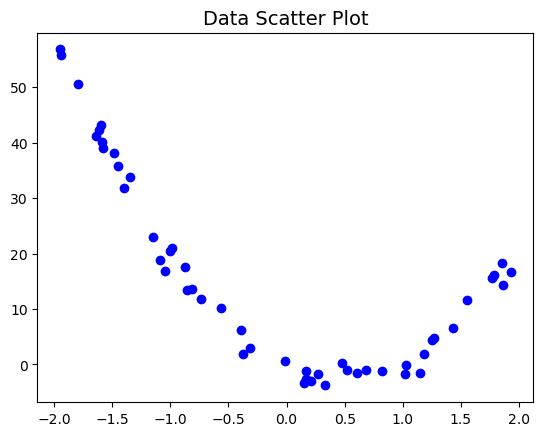

In [39]:
N = 50
t = 1e-4
max_iter2 = 50000
x_vals = np.random.uniform(-2, 2, N)
noise = 2*np.random.normal(size=N)

beta0 = 0
beta1 = -10
beta2 = 10
y_vals = beta0 + beta1*x_vals + beta2*x_vals**2 + noise

plt.scatter(x_vals, y_vals, color='blue')
plt.title('Data Scatter Plot', size = 14)
plt.show()

Beta0 =  -0.3183404204362685
Beta1 =  -9.590145262010035
Beta2 =  10.130783824097358


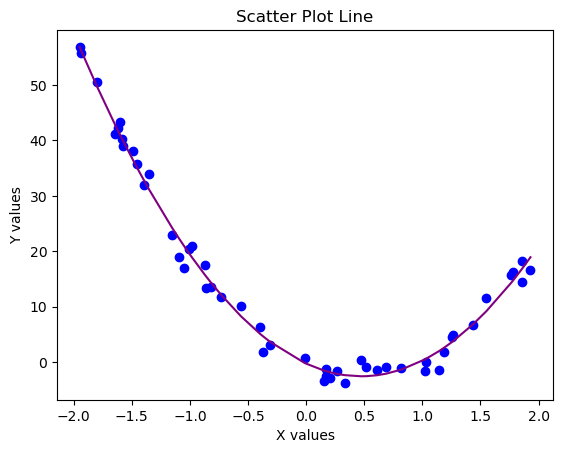

In [40]:
def L2(B, X, y):
    return (np.linalg.norm(X@B-y)**2) / N


def gradient_descent2(B, X, y):
    for i in range(max_iter2):
        B = B - t*gradient(B, X, y)
    return B


X = np.zeros((N, 3))
for i in range(N):
    xi = x_vals[i]
    X[i, 0] = 1
    X[i, 1] = xi
    X[i, 2] = xi**2

beta = [0, 1, 1]  # testing
newBeta = gradient_descent2(beta, X, y_vals)

y_pred = newBeta[0] + newBeta[1]*x_vals + newBeta[2]*x_vals**2

plt.figure()
plt.scatter(x_vals, y_vals, label='True Data',color='blue')
sorted_idxs = np.argsort(x_vals)
x_vals_sorted = x_vals[sorted_idxs]
y_pred_sorted = y_pred[sorted_idxs]
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot Line")
plt.plot(x_vals_sorted, y_pred_sorted, color='purple', label='Fit Curve')
print("Beta0 = ", newBeta[0])
print("Beta1 = ", newBeta[1])
print("Beta2 = ", newBeta[2])